<a href="https://colab.research.google.com/github/jonhyuk0922/Tensorflow-Dev/blob/main/Course1_4_Using_Real_world_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. ImageGenerator of Human and Horses

In [22]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [23]:
import matplotlib.image as mpimg

##1-1. 데이터 불러오기
말과 사람의 이미지를 분류하는 분류기를 만들어 볼 것이다. 학습데이터는 로렌스가 제공한 링크에서 불러온다.

In [24]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2021-04-28 06:21:49--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 74.125.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   140MB/s    in 1.0s    

2021-04-28 06:21:50 (140 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [25]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

##1-2. 디렉토리 분류

In [26]:
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

In [27]:
# 디렉토리 지정 잘 됐는 지 파일들 확인
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse24-0.png', 'horse02-2.png', 'horse03-1.png', 'horse11-6.png', 'horse07-8.png', 'horse45-3.png', 'horse19-6.png', 'horse41-1.png', 'horse48-7.png', 'horse32-1.png']
['human13-16.png', 'human04-29.png', 'human05-16.png', 'human12-21.png', 'human12-30.png', 'human14-08.png', 'human17-22.png', 'human02-16.png', 'human17-26.png', 'human02-17.png']


In [28]:
#디렉토리 별 사진 갯수 확인
print('total training horse images:', len(train_horse_names))
print('total training human images:', len(train_human_names))

total training horse images: 500
total training human images: 527


In [29]:
%matplotlib inline

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

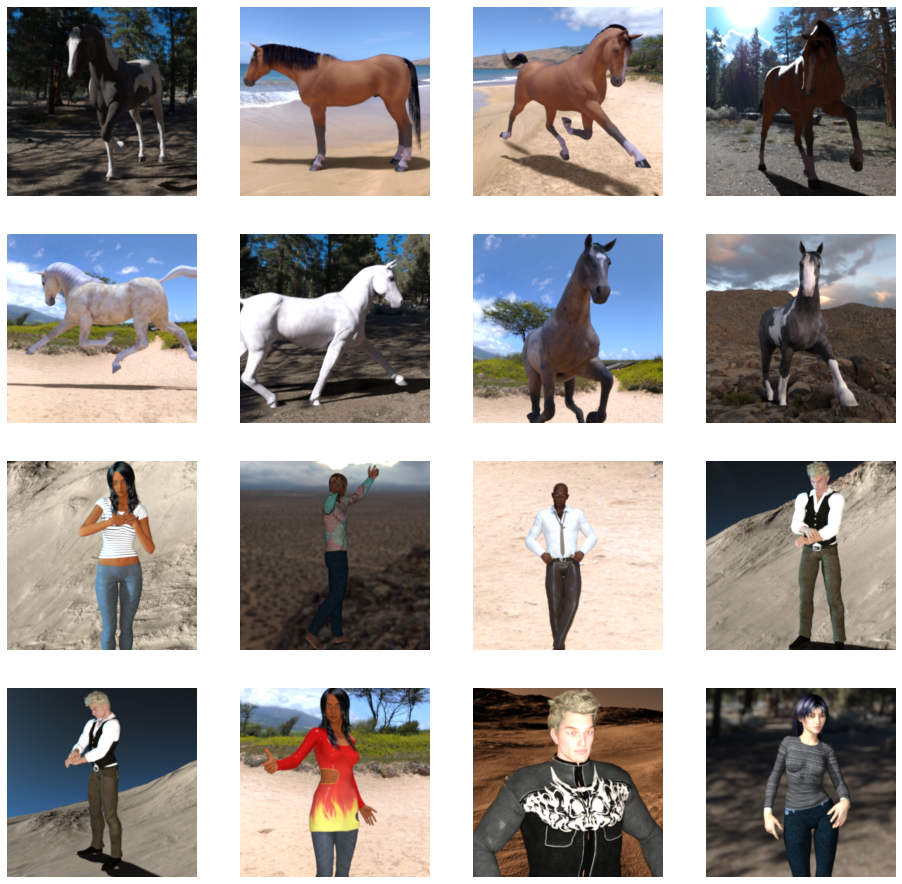

In [30]:

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

##1-3. 간단한 모델 구현

In [31]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape = (300,300,3)),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')

])

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 33, 64)       

##1-4. 모델 컴파일

In [33]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['accuracy'])

##1-5. Data Preprocessing

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255) #이미지 정규화 

train_generator = train_datagen.flow_from_directory(
    '/tmp/horse-or-human',
    target_size = (300,300),
    batch_size = 128,
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.


##1-6. Training

In [35]:
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1
)

Epoch 1/15
8/8 [==============================] - 6s 798ms/step - loss: 0.9098 - accuracy: 0.4874
Epoch 2/15
8/8 [==============================] - 6s 689ms/step - loss: 0.8450 - accuracy: 0.7217
Epoch 3/15
8/8 [==============================] - 6s 671ms/step - loss: 0.6007 - accuracy: 0.7566
Epoch 4/15
8/8 [==============================] - 6s 674ms/step - loss: 0.3647 - accuracy: 0.8781
Epoch 5/15
8/8 [==============================] - 6s 675ms/step - loss: 0.2004 - accuracy: 0.9316
Epoch 6/15
8/8 [==============================] - 6s 672ms/step - loss: 0.1124 - accuracy: 0.9730
Epoch 7/15
8/8 [==============================] - 6s 778ms/step - loss: 0.2287 - accuracy: 0.9166
Epoch 8/15
8/8 [==============================] - 6s 669ms/step - loss: 0.1056 - accuracy: 0.9684
Epoch 9/15
8/8 [==============================] - 6s 784ms/step - loss: 0.3803 - accuracy: 0.8981
Epoch 10/15
8/8 [==============================] - 6s 673ms/step - loss: 0.0781 - accuracy: 0.9672
Epoch 11/15
8/8 [==

##1-7. 이미지 분류기 실행

In [36]:
from google.colab import files
from keras.preprocessing import image

uploaded =files.upload()

for fn in uploaded.keys():
  #predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300,300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images =np.vstack([x]) #두개의 배열 붙일 때 사용
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0] > 0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving horses-2904536__480.jpg to horses-2904536__480.jpg
[0.]
horses-2904536__480.jpg is a horse


#2. ImageGenerator of Human and Horses (+Validation set)

* 학습 데이터셋이서면 정확도 체크해보는 건 의미가 없어서 검증 셋 다운로드.

In [37]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

##2-1. 데이터 불러오기

In [39]:
#학습 데이터
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

#검증 데이터
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2021-04-28 06:26:54--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.199.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   162MB/s    in 0.9s    

2021-04-28 06:26:56 (162 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2021-04-28 06:26:56--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480

In [40]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

##2-2. 데이터 디렉토리 지정

In [41]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# Directory with our validation horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with our validation human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

In [42]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_hames = os.listdir(validation_horse_dir)
print(validation_horse_hames[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse24-0.png', 'horse02-2.png', 'horse03-1.png', 'horse11-6.png', 'horse07-8.png', 'horse45-3.png', 'horse19-6.png', 'horse41-1.png', 'horse48-7.png', 'horse32-1.png']
['human13-16.png', 'human04-29.png', 'human05-16.png', 'human12-21.png', 'human12-30.png', 'human14-08.png', 'human17-22.png', 'human02-16.png', 'human17-26.png', 'human02-17.png']
['horse5-164.png', 'horse3-070.png', 'horse5-458.png', 'horse4-599.png', 'horse4-102.png', 'horse2-218.png', 'horse1-122.png', 'horse5-018.png', 'horse6-161.png', 'horse2-254.png']
['valhuman01-11.png', 'valhuman03-17.png', 'valhuman05-21.png', 'valhuman04-23.png', 'valhuman01-09.png', 'valhuman01-18.png', 'valhuman03-04.png', 'valhuman01-12.png', 'valhuman01-04.png', 'valhuman04-06.png']


In [43]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))
# 학습 : (말-사람) 500,527 / 검증 : 128,128

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


##2-3. 데이터 시각화

In [44]:
%matplotlib inline #화면 안에 그려달라는 명령어

import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

UsageError: unrecognized arguments: #화면 안에 그려달라는 명령어


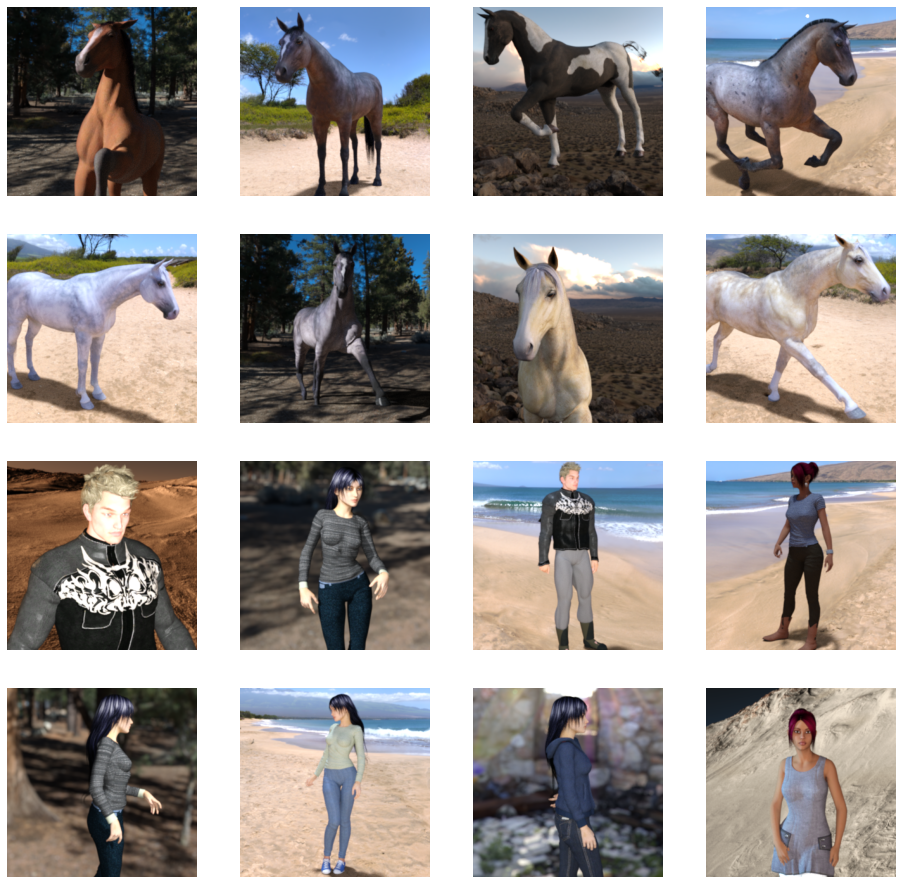

In [45]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

##2-4. 모델 수립

In [47]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dense(1,activation='sigmoid') 
])

In [48]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 33, 33, 64)       

##2-5. 모델 컴파일

In [60]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

##2-6. 이미지 전처리

In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    '/tmp/horse-or-human/',
    target_size = (300,300),
    batch_size =128,
    class_mode='binary')

validation_generator=validation_datagen.flow_from_directory(
    '/tmp/validation-horse-or-human/',
    target_size = (300,300),
    batch_size = 32,
    class_mode = 'binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


##2-7. 학습

In [62]:
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=10,
    verbose=1,
    validation_data = validation_generator,
    validation_steps=8)

Epoch 1/10
8/8 [==============================] - 7s 863ms/step - loss: 0.0879 - accuracy: 0.9800 - val_loss: 1.6850 - val_accuracy: 0.8164
Epoch 2/10
8/8 [==============================] - 7s 850ms/step - loss: 0.0253 - accuracy: 0.9967 - val_loss: 1.3005 - val_accuracy: 0.8516
Epoch 3/10
8/8 [==============================] - 7s 961ms/step - loss: 0.1190 - accuracy: 0.9622 - val_loss: 1.8024 - val_accuracy: 0.8164
Epoch 4/10
8/8 [==============================] - 7s 845ms/step - loss: 0.0375 - accuracy: 0.9844 - val_loss: 1.3472 - val_accuracy: 0.8438
Epoch 5/10
8/8 [==============================] - 7s 905ms/step - loss: 0.0820 - accuracy: 0.9697 - val_loss: 2.5277 - val_accuracy: 0.7852
Epoch 6/10
8/8 [==============================] - 7s 969ms/step - loss: 0.0348 - accuracy: 0.9900 - val_loss: 1.4884 - val_accuracy: 0.8359
Epoch 7/10
8/8 [==============================] - 7s 861ms/step - loss: 0.0194 - accuracy: 0.9956 - val_loss: 1.9127 - val_accuracy: 0.8320
Epoch 8/10
8/8 [====

##2-8. 이미지 분류기

In [65]:
from google.colab import files 
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300,300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size =10)
  print(classes[0])
  if classes[0] > 0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving 바다_아침.png to 바다_아침.png
[1.]
바다_아침.png is a human


##2-9. 모델학습 시각화

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


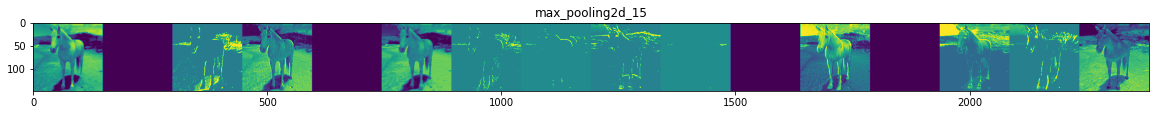

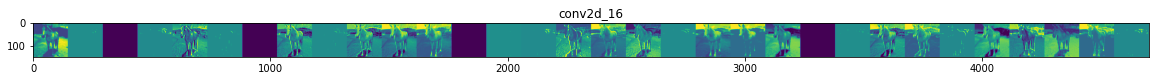

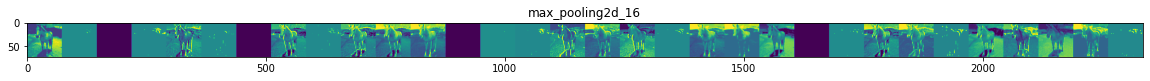

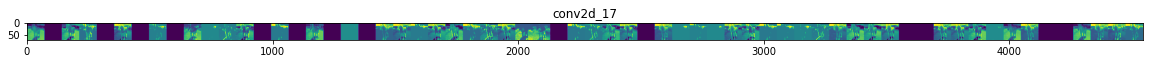

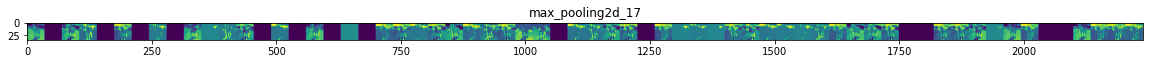

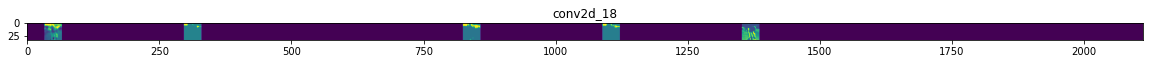

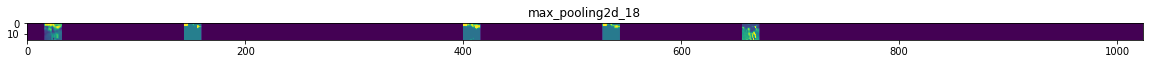

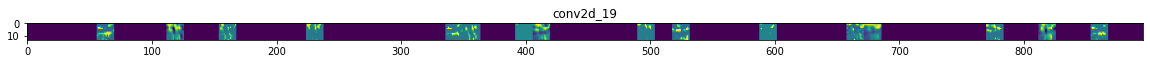

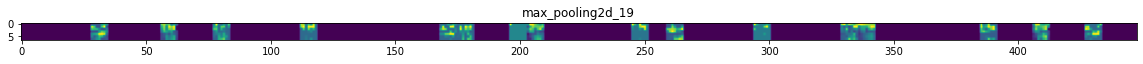

In [66]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')